## Regression 

-  statistical method to analyse relationship between two variables
- dependent and inpendent
- observe the relationship
- In ML, regression problems, in which we try to estimate or predict a continous value (not classes)
- e.g temperature, price, size,

#### Linear Regression

- type of regression, we observe linear relationships 
- Linear regressor

##### Polynomial Regression

- type of regression, we observe non-linear relationships 
- Polynomial regressor

> # Linear Regression

- Problem
- Data
- Train a model on that data
- test that model
- improve performance



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# data
from sklearn.datasets import fetch_california_housing

# training - traintest split - model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = fetch_california_housing()

housing_df = pd.DataFrame(data.data, columns=data.feature_names)
housing_df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3568,4.8929,35.0,5.638235,0.923529,1019.0,2.997059,34.23,-118.58
9822,2.5625,52.0,4.947368,1.063158,578.0,2.028070,36.62,-121.92
13739,3.6875,38.0,6.753388,1.032520,1003.0,2.718157,34.04,-117.18
4935,1.3403,43.0,4.200000,1.112821,1213.0,3.110256,34.00,-118.27
18727,2.0258,20.0,4.599232,1.111396,1865.0,2.387964,40.56,-122.36


- Median Income: median income in the block
- House Age: how old the house is
- Average Rooms: number of rooms
- Average Bedrooms
- Population: population of the block
- Average Occupancy: how many people live in house
- Latitude and longitude - Coordiates, or Location of the house


> We will try to predict `house price` based on these features

In [3]:
housing_df['Price'] = data.target
housing_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [4]:
4.526 * 100000

452600.0

In [5]:
# modeling

model_LR = LinearRegression()

# Train Test Data Features
X = housing_df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']] # can have a lot of features - x1, x2, x3, x4, x5 ...
y = housing_df['Price']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [6]:
# Model Training
 
model_LR.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# let's see our model Parameters

print('Slope of the model: ',model_LR.coef_) # slope for all the B1*x1, B2*x2, B3*x3
print('Intercept of the model: ',model_LR.intercept_)

Slope of the model:  [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept of the model:  -37.023277706064064


In [8]:
# testing data
y_predictions = model_LR.predict(X_test)
y_predictions

# evaluate the model performance
mae = mean_absolute_error(y_test,y_predictions)
mse = mean_squared_error(y_test,y_predictions)
r2 = r2_score(y_test,y_predictions)


In [9]:
print("MAE - should be close to 0: ",mae)
print("MSE - should be close to 0: ",mse)
print("-------------------------")
print("R2 Score - should be close to 1: ",r2)

MAE - should be close to 0:  0.5332001304956558
MSE - should be close to 0:  0.555891598695244
-------------------------
R2 Score - should be close to 1:  0.5757877060324511


<function matplotlib.pyplot.show(close=None, block=None)>

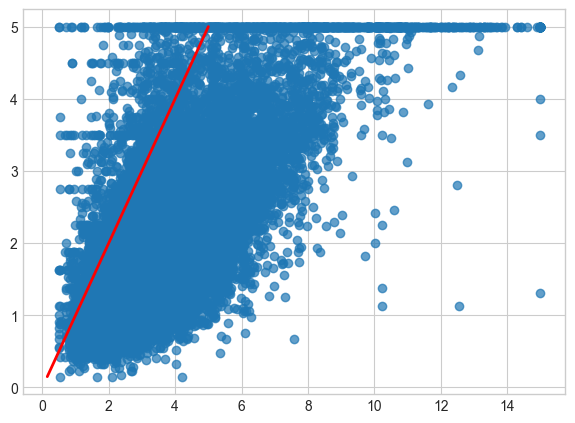

In [21]:
# Visualise this regression for just one variable - MedInc

plt.rcParams["figure.figsize"] = (7, 5)
plt.style.use("seaborn-v0_8-whitegrid")

plt.scatter(housing_df.MedInc , housing_df.Price, alpha=0.7)
# actual vs predicted values
x_points =[y_test.min(),y_test.max()]
y_points = x_points
plt.plot(x_points,y_points, 'r', lw=2)

plt.show